### Outlier Detection using IQR

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

df = load_wine(as_frame = True)
df = df.data
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


*This method is used for outlier detection when the underlying distribution of a feature is not normal.*

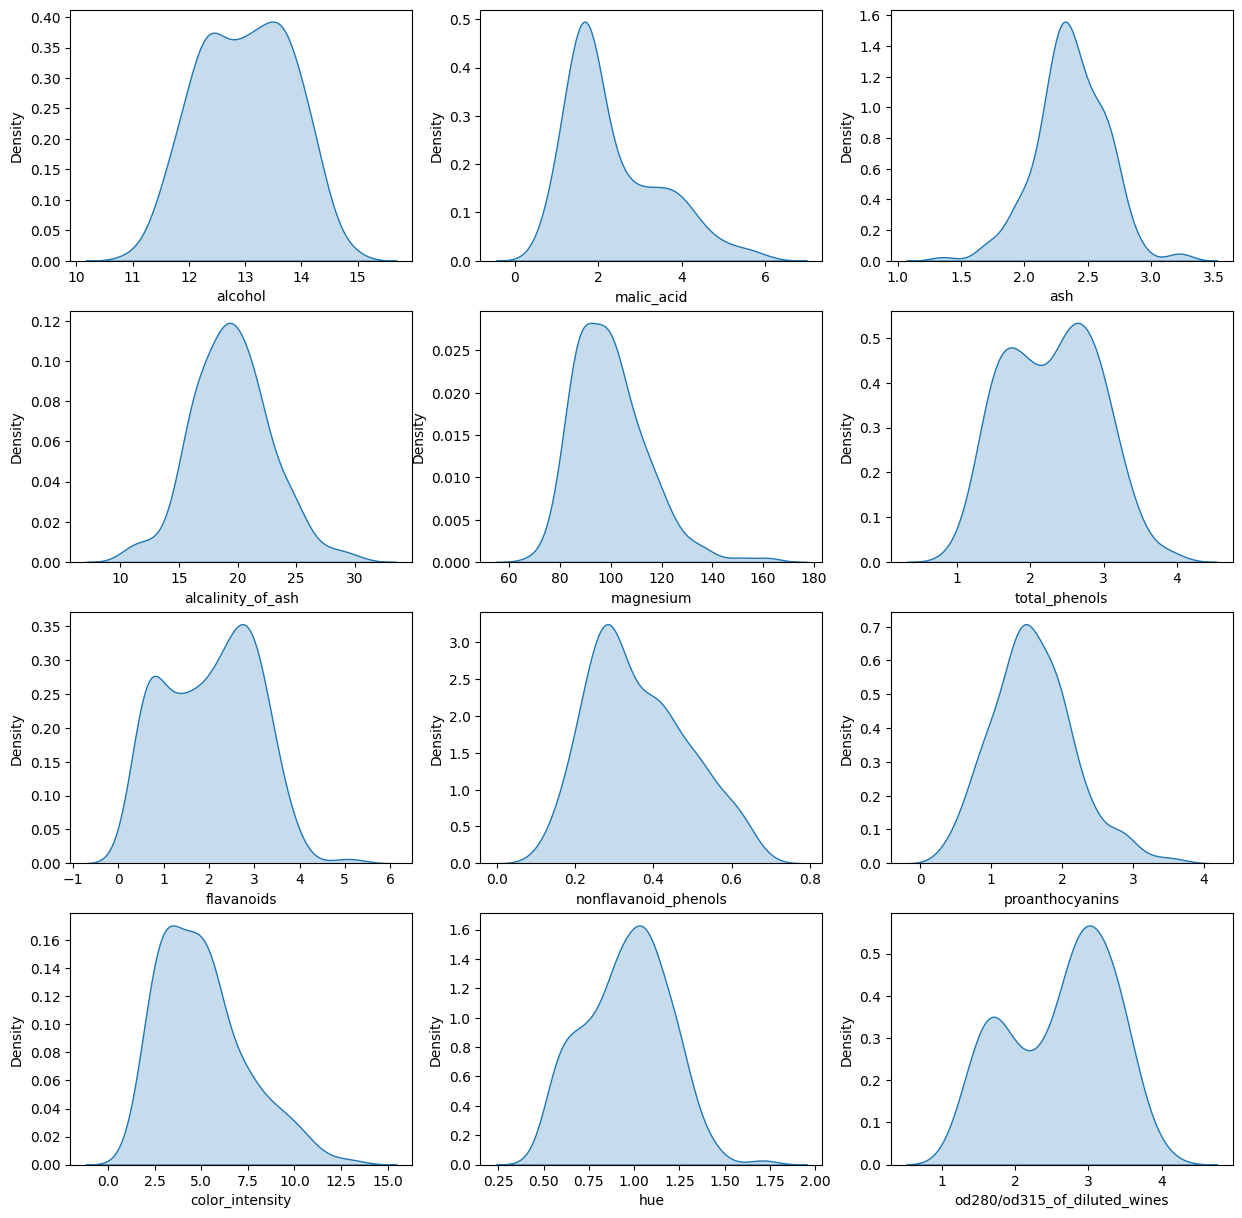

In [50]:
fig, ax = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 15))
for i in range(4):
    for j in range(3):
        sns.kdeplot(data = df.iloc[:, i * 3 + j], ax = ax[i, j], fill = True)
        ax[i, j].grid(False)
plt.show()

*Let's now examine the `malic_acid` column more closely.*

In [51]:
df['malic_acid'].describe()

count    178.000000
mean       2.336348
std        1.117146
min        0.740000
25%        1.602500
50%        1.865000
75%        3.082500
max        5.800000
Name: malic_acid, dtype: float64

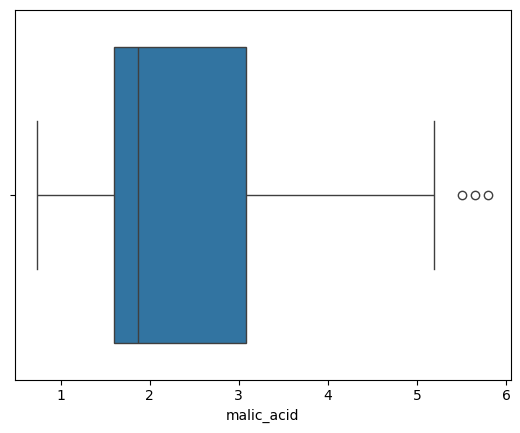

In [52]:
sns.boxplot(x = df['malic_acid'])
plt.show()

In [53]:
# Finding the IQR
percentile25 = df['malic_acid'].quantile(0.25)
percentile75 = df['malic_acid'].quantile(0.75)

IQR = percentile75 - percentile25
print("IQR:", IQR)

IQR: 1.48


In [54]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

print("Highest allowed", upper_limit)
print("Lowest allowed", lower_limit)

Highest allowed 5.3025
Lowest allowed -0.6174999999999997


In [55]:
df[df['malic_acid'] > upper_limit]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380.0
137,12.53,5.51,2.64,25.0,96.0,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515.0
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0


In [56]:
df[df['malic_acid'] < lower_limit]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline


### Trimming the Outliers

In [57]:
outliers = df[(df['malic_acid'] > upper_limit) | (df['malic_acid'] < lower_limit)]
new_df = df.drop(index = outliers.index)
new_df.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
124,11.87,4.31,2.39,21.0,82.0,2.86,3.03,0.21,2.91,2.8,0.75,3.64,380.0
133,12.70,3.55,2.36,21.5,106.0,1.70,1.20,0.17,0.84,5.0,0.78,1.29,600.0
58,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.8,0.89,2.87,1285.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0
90,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.4,1.08,2.27,480.0


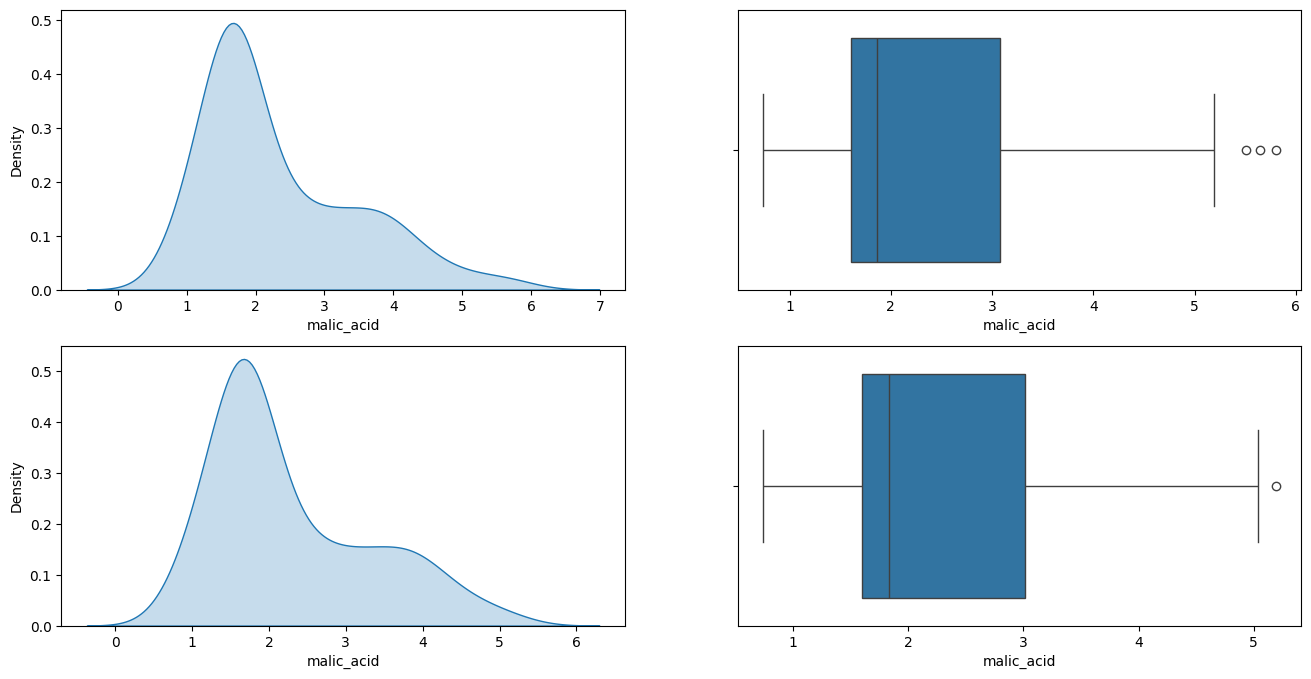

In [58]:
# Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['malic_acid'], fill = True)

plt.subplot(2,2,2)
sns.boxplot(x = df['malic_acid'])

plt.subplot(2,2,3)
sns.kdeplot(new_df['malic_acid'], fill = True)

plt.subplot(2,2,4)
sns.boxplot(x = new_df['malic_acid'])

plt.show()

### Capping the Outliers

In [59]:
capped_df = df.copy()
capped_df['malic_acid'] = np.clip(a = df['malic_acid'], a_min = lower_limit, a_max = upper_limit)

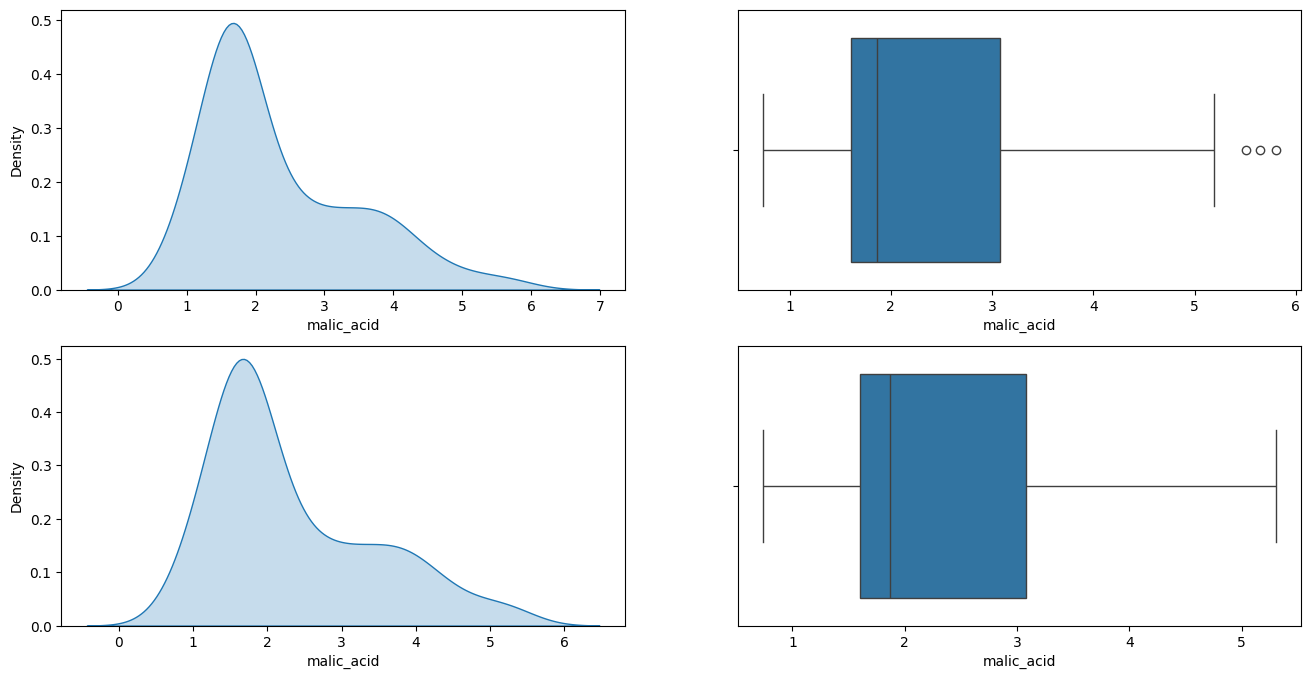

In [60]:
# Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.kdeplot(df['malic_acid'], fill = True)

plt.subplot(2,2,2)
sns.boxplot(x = df['malic_acid'])

plt.subplot(2,2,3)
sns.kdeplot(capped_df['malic_acid'], fill = True)

plt.subplot(2,2,4)
sns.boxplot(x = capped_df['malic_acid'])

plt.show()